In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv(r'..\JNB_data\HR_data.csv')

In [3]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [25]:
left_org = df[df.left == 1]

In [26]:
stay_org = df[df.left == 0]

In [36]:
stay_org[['salary', 'satisfactionlevelrange']].value_counts().sort_values()

salary  satisfactionlevelrange
high    0.1                        29
        0.3                        30
        0.4                        53
        0.2                        70
        1.0                        82
medium  0.1                        85
low     0.1                        99
high    0.5                       148
medium  0.3                       153
high    0.9                       156
low     0.3                       167
high    0.7                       167
low     0.4                       190
medium  0.4                       193
high    0.8                       196
        0.6                       224
medium  0.2                       272
low     0.2                       284
medium  1.0                       381
low     1.0                       382
        0.5                       599
medium  0.5                       618
low     0.7                       757
medium  0.9                       770
low     0.9                       787
medium  0.7        

In [31]:
left_org.salary.value_counts()

salary
low       2172
medium    1317
high        82
Name: count, dtype: int64

In [6]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


<Axes: xlabel='Percent', ylabel='satisfaction_level'>

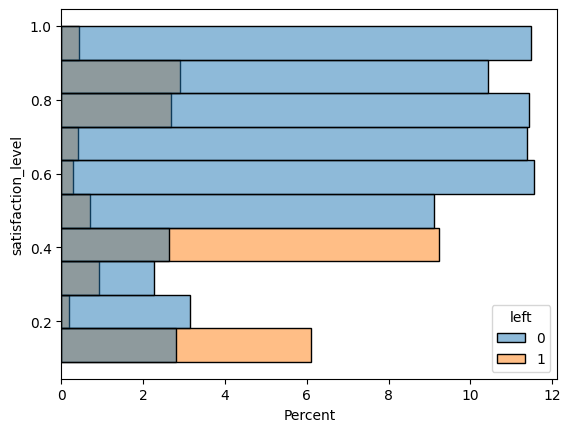

In [22]:
import seaborn as sns
sns.histplot(data=df, y='satisfaction_level', bins= 10, edgecolor='black', hue= 'left',stat='percent')
#satisfaction level < 0.6, people tend to leave the organization

In [8]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [15]:
# def round_values(x):
#     c = 0
#     y = 0.1
#     while True:
#         if c<x<y:
#             avg =  (c+y)/2
#             if x <= avg:
#                 x = c
#                 return round(x,1)
#             else:
#                 x = y
#                 return round(x,1)
#         else:
#             c = c+0.1 
#             y = c+0.1

In [14]:
def round_values(x):
    bin_size = 0.1
    return round(x / bin_size) * bin_size

In [15]:
df['satisfactionlevelrange'] =  df.satisfaction_level.apply(round_values)

In [17]:
df.satisfactionlevelrange.value_counts()

satisfactionlevelrange
0.8    2541
0.6    2161
0.9    2008
0.4    1917
0.7    1885
0.5    1471
0.1    1121
1.0     845
0.2     652
0.3     398
Name: count, dtype: int64

<Axes: xlabel='left'>

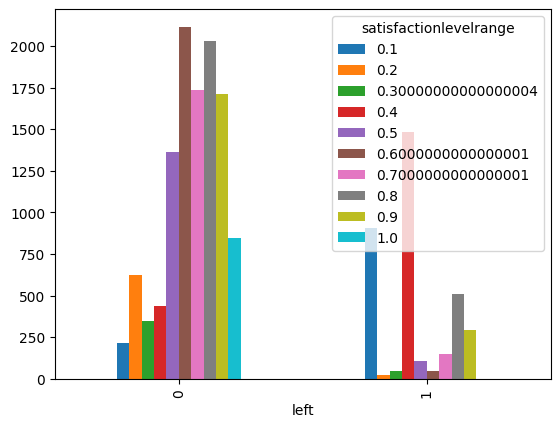

In [20]:
pd.crosstab(df.left,df.satisfactionlevelrange).plot(kind='bar')

<Axes: xlabel='satisfactionlevelrange'>

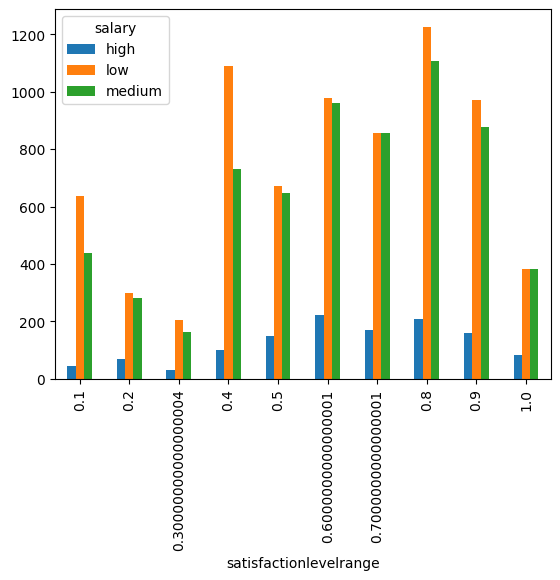

In [24]:
pd.crosstab(df.satisfactionlevelrange, df.salary).plot(kind='bar')

<Axes: ylabel='Frequency'>

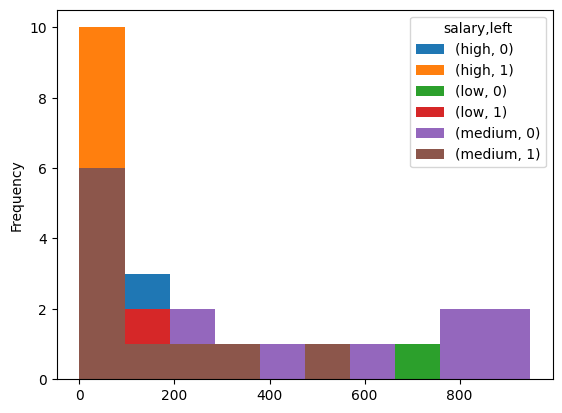

In [40]:
pd.crosstab(df.satisfactionlevelrange,[df.salary, df.left]).plot(kind='hist')

<Axes: xlabel='Department'>

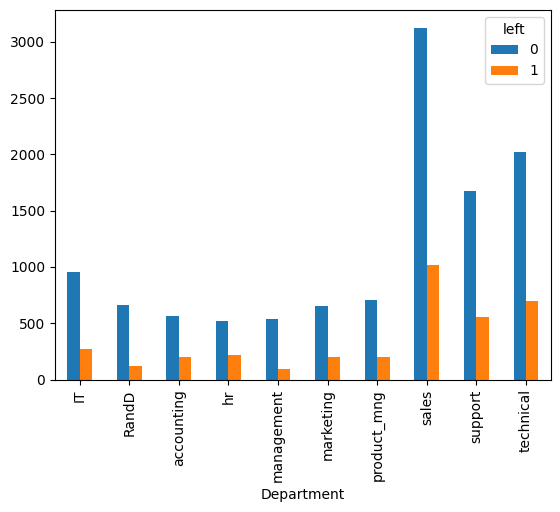

In [10]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [41]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary',
       'satisfactionlevelrange'],
      dtype='object')

In [42]:
required_df = df[['satisfaction_level','time_spend_company','promotion_last_5years','average_montly_hours','salary']]

In [43]:
required_df

,satisfaction_level,time_spend_company,promotion_last_5years,average_montly_hours,salary
0,0.38,3,0,157,low
1,0.80,6,0,262,medium
2,0.11,4,0,272,medium
3,0.72,5,0,223,low
4,0.37,3,0,159,low
...,...,...,...,...,...
14994,0.40,3,0,151,low
14995,0.37,3,0,160,low
14996,0.37,3,0,143,low
14997,0.11,4,0,280,low


In [47]:
salary_dummies = pd.get_dummies(required_df.salary, prefix='salary')

In [49]:
df_for_model = pd.concat([required_df, salary_dummies],axis=1)

In [53]:
df_for_model

,satisfaction_level,time_spend_company,promotion_last_5years,average_montly_hours,salary,salary_high,salary_low,salary_medium
0,0.38,3,0,157,low,False,True,False
1,0.80,6,0,262,medium,False,False,True
2,0.11,4,0,272,medium,False,False,True
3,0.72,5,0,223,low,False,True,False
4,0.37,3,0,159,low,False,True,False
...,...,...,...,...,...,...,...,...
14994,0.40,3,0,151,low,False,True,False
14995,0.37,3,0,160,low,False,True,False
14996,0.37,3,0,143,low,False,True,False
14997,0.11,4,0,280,low,False,True,False


In [54]:
df_for_model.drop('salary', inplace=True,axis=1)

In [55]:
df_for_model

,satisfaction_level,time_spend_company,promotion_last_5years,average_montly_hours,salary_high,salary_low,salary_medium
0,0.38,3,0,157,False,True,False
1,0.80,6,0,262,False,False,True
2,0.11,4,0,272,False,False,True
3,0.72,5,0,223,False,True,False
4,0.37,3,0,159,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,3,0,151,False,True,False
14995,0.37,3,0,160,False,True,False
14996,0.37,3,0,143,False,True,False
14997,0.11,4,0,280,False,True,False


In [56]:
X = df_for_model
X.head()

,satisfaction_level,time_spend_company,promotion_last_5years,average_montly_hours,salary_high,salary_low,salary_medium
0,0.38,3,0,157,False,True,False
1,0.80,6,0,262,False,False,True
2,0.11,4,0,272,False,False,True
3,0.72,5,0,223,False,True,False
4,0.37,3,0,159,False,True,False


In [57]:
y = df.left

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [68]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [69]:
model.fit(X_train, y_train)

C:\Python_Vignesh\ML_venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
model.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
model.score(X_test,y_test)

0.7687619047619048

In [76]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler2 = MinMaxScaler()

In [77]:
# Fit scaler to training data and transform training data
X_train_scaled = scaler2.fit_transform(X_train)

# Transform testing data using the same scaler
X_test_scaled = scaler2.transform(X_test)

In [80]:
# Initialize logistic regression model
log_reg = LogisticRegression()

# Fit logistic regression model to the scaled training data
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [81]:
log_reg.score(X_test,y_test)

C:\Python_Vignesh\ML_venv\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


0.23866666666666667